In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [170]:
# Read the file into a DataFrame: mydata and store dataframe in df
mydata = pd.read_csv(r'tempreture_1901_2016_pakistan.csv')
df = pd.DataFrame(mydata, columns = ['Temperature - (Celsius)','Year','Month'])

# Classification of Data


In [3]:
print(df)

      Temperature - (Celsius)  Year      Month
0                     7.72768  1901    January
1                     8.93600  1901   February
2                    16.96320  1901      March
3                    21.27410  1901      April
4                    26.04970  1901        May
...                       ...   ...        ...
1387                 27.63320  2016     August
1388                 26.71790  2016  September
1389                 22.39820  2016    October
1390                 15.76720  2016   November
1391                 12.87630  2016   December

[1392 rows x 3 columns]


In [4]:
df.head()

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May


In [5]:
df.tail()

,Temperature - (Celsius),Year,Month
1387,27.6332,2016,August
1388,26.7179,2016,September
1389,22.3982,2016,October
1390,15.7672,2016,November
1391,12.8763,2016,December


In [6]:
df.shape

(1392, 3)

In [7]:
df.columns

Index(['Temperature - (Celsius)', 'Year', 'Month'], dtype='object')

In [8]:
# Frequency count for Categorical Data

In [9]:
print(df['Temperature - (Celsius)'].value_counts(dropna=False))

print(df['Temperature - (Celsius)'].shape)

27.6078    2
27.7522    2
20.5152    2
25.0969    2
28.9070    1
          ..
28.0987    1
28.8703    1
29.2542    1
25.8970    1
12.8763    1
Name: Temperature - (Celsius), Length: 1388, dtype: int64
(1392,)


In [10]:
print(df['Year'].value_counts(dropna=False))

print(df['Year'].shape)

1901    12
1974    12
1986    12
1985    12
1984    12
        ..
1935    12
1934    12
1933    12
1932    12
2016    12
Name: Year, Length: 116, dtype: int64
(1392,)


In [11]:
print(df['Month'].value_counts(dropna=False))

print(df['Month'].shape)

January      116
February     116
March        116
April        116
May          116
June         116
July         116
August       116
September    116
October      116
November     116
December     116
Name: Month, dtype: int64
(1392,)


# Analyzing missing values and noisy data


In [12]:
df.isna()

,Temperature - (Celsius),Year,Month
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1387,False,False,False
1388,False,False,False
1389,False,False,False
1390,False,False,False


In [13]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["Temperature - (Celsius)"])
# displaying data with empty strings = NaN
df[bool_series]

,Temperature - (Celsius),Year,Month


In [14]:
#As from above commands it can be seen that there are not any empty cells so no need to do interpolaion

In [15]:
# Create the Histogram plot

Text(0, 0.5, 'frequency')

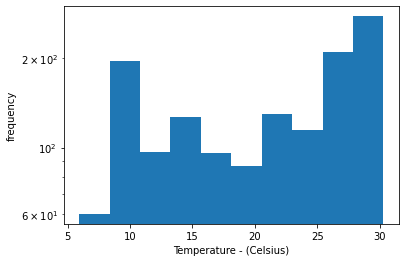

In [16]:
plt.hist(df['Temperature - (Celsius)'], log=True)
plt.xlabel('Temperature - (Celsius)')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

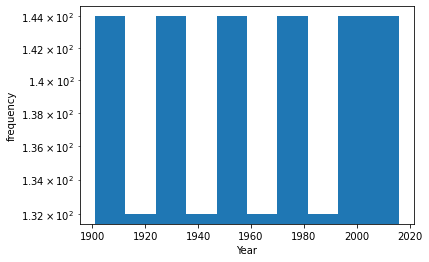

In [17]:
plt.hist(df['Year'], log=True)
plt.xlabel('Year')
plt.ylabel('frequency')

Text(0.5, 0, 'Temperature - (Celsius)')

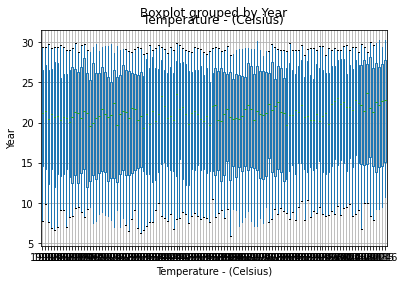

In [18]:
# Creating the boxplot
df.boxplot("Temperature - (Celsius)", "Year")
plt.ylabel('Year')
plt.xlabel('Temperature - (Celsius)')

In [19]:
# Display the plot
plt.show()

Text(0, 0.5, 'Year')

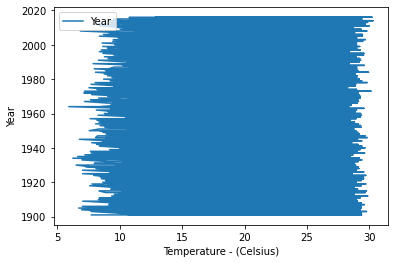

In [20]:
df.plot("Temperature - (Celsius)", "Year")
plt.ylabel('Year')

In [21]:
#As can be seen, the graph is difficult to understand. There are various lines making it difficult to see individual trends. 

In [22]:
#So we can go for Scatter Plot

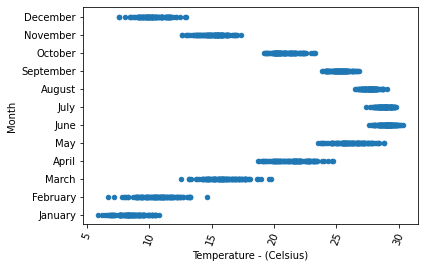

In [23]:
df.plot(kind='scatter', x='Temperature - (Celsius)', y='Month', rot=70)
plt.show()

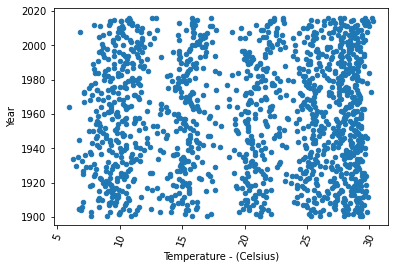

In [24]:
df.plot(kind='scatter', x='Temperature - (Celsius)', y='Year', rot=70)
plt.show()

In [25]:
# Now we can apply different types of regressions to find the co-rrealtion

# Numpy operations

In [29]:
#basic examination using numpy

In [30]:
#Make sure to import numpy as np and loading the data

In [31]:
data = np.genfromtxt('tempreture_1901_2016_pakistan.csv',delimiter=',', skip_header= True,)

In [32]:
print(data)

[[   7.72768 1901.             nan]
 [   8.936   1901.             nan]
 [  16.9632  1901.             nan]
 ...
 [  22.3982  2016.             nan]
 [  15.7672  2016.             nan]
 [  12.8763  2016.             nan]]


In [33]:
#splitting data into column arrays using numpy

In [34]:
Temperature = data[:,0]

In [35]:
Year = data[:,1]

In [36]:
print(Temperature)

[ 7.72768  8.936   16.9632  ... 22.3982  15.7672  12.8763 ]


In [37]:
print(Year)

[1901. 1901. 1901. ... 2016. 2016. 2016.]


In [38]:
#some basic observations

In [39]:
print(Temperature.min())

5.91348


In [40]:
print(Temperature.max())

30.3058


In [41]:
#check for missing or bad data using numpy

In [42]:
Temperature_mask = np.isfinite(Temperature)

In [43]:
print("Number of Temperature:", np.count_nonzero(Temperature_mask))

Number of Temperature: 1392


In [44]:
missing_Temperature_mask = ~np.isfinite(Temperature)

In [45]:
print("Number of missing Temperatures:", np.count_nonzero(missing_Temperature_mask))

Number of missing Temperatures: 0


In [46]:
#calculating average Annual temperature

In [47]:
tmax = Temperature[(Year >= 1901) & (Year <= 2016)]

In [48]:
tmax.mean()

20.007129439655174

In [49]:
#conversion using numpy

In [50]:
def CelsiusTofahr(Temperature):
    return (Temperature * (1.8) + 32)

In [51]:
conversion = CelsiusTofahr(Temperature)

In [52]:
print(conversion)

[45.909824 48.0848   62.53376  ... 72.31676  60.38096  55.17734 ]


# Pandas operations

In [63]:
df.head()

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May


In [64]:
df.describe()

,Temperature - (Celsius),Year
count,1392.000000,1392.000000
mean,20.007129,1958.500000
std,7.377193,33.497105
min,5.913480,1901.000000
25%,13.119875,1929.750000
50%,21.170700,1958.500000
75%,27.211500,1987.250000
max,30.305800,2016.000000


In [65]:
df.memory_usage()

Index                        128
Temperature - (Celsius)    11136
Year                       11136
Month                      11136
dtype: int64

In [66]:
df.value_counts()

Temperature - (Celsius)  Year  Month    
5.91348                  1964  January      1
25.57640                 1970  September    1
25.65530                 1959  May          1
25.62850                 1903  May          1
25.62080                 1945  May          1
                                           ..
15.52180                 1914  November     1
15.51460                 1997  March        1
15.50510                 1933  November     1
15.50380                 1991  March        1
30.30580                 2014  June         1
Length: 1392, dtype: int64

In [67]:
df.drop_duplicates()

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May
...,...,...,...
1387,27.63320,2016,August
1388,26.71790,2016,September
1389,22.39820,2016,October
1390,15.76720,2016,November


# plotting through matplotlib 

In [68]:
import matplotlib.pyplot as plt

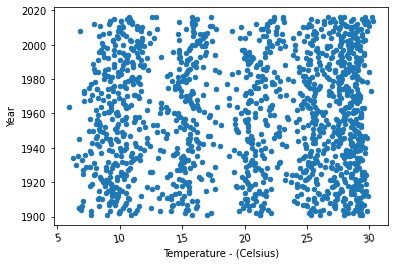

In [69]:
df.plot(kind='scatter', x='Temperature - (Celsius)', y='Year', rot=10)
plt.show()

In [70]:
x = df['Temperature - (Celsius)']
y = df['Year']

<BarContainer object of 1392 artists>

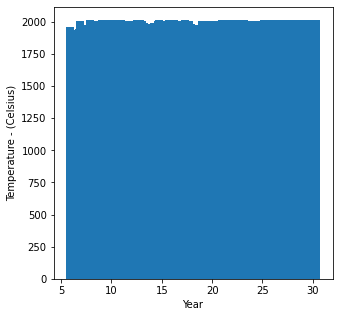

In [71]:
fig, ax = plt.subplots(figsize = (5,5))
plt.ylabel('Temperature - (Celsius)')
plt.xlabel('Year')
plt.bar(x,y)


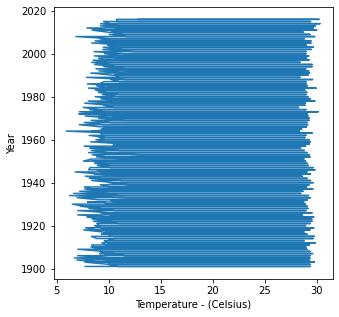

In [72]:
fig, ax = plt.subplots(figsize = (5,5))
plt.xlabel('Temperature - (Celsius)')
plt.ylabel('Year')
ax.plot(x,y)

Text(0, 0.5, 'Year')

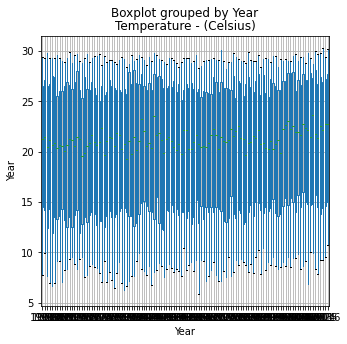

In [73]:
df.boxplot("Temperature - (Celsius)", "Year",figsize=(5,5))
plt.ylabel('Year')

# plotting through seaborn

In [74]:
import seaborn as sns

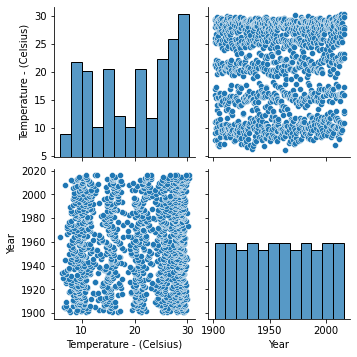

In [75]:
sns.pairplot(df)

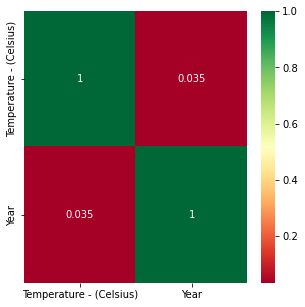

In [76]:
# plot heat map to get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

# Machine learning models

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [78]:
#linear regression

In [79]:
a, b = np.polyfit(x,y,1)

In [80]:
# Print the slope and intercept
print(a,b)

0.15742049691861193 1955.3504677416947


In [81]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

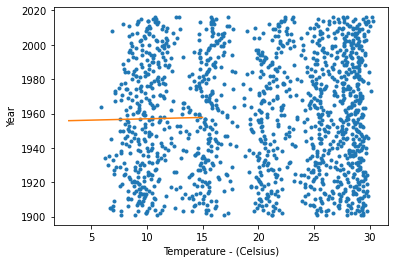

In [82]:
# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
# Label the axes
plt.xlabel('Temperature - (Celsius)')
plt.ylabel('Year')

# Show the plot
plt.show()

In [316]:
#Also Linear Regression
# y = m*x+c

In [300]:
x = df['Year']
y = df['Temperature - (Celsius)']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 51)

In [295]:
lr = LinearRegression()

In [301]:
lr.fit(np.array(x_train).reshape(-1,1) ,y_train)

LinearRegression()

In [304]:
lr.coef_

array([0.00714413])

In [306]:
lr.intercept_

6.015343056806184

In [307]:
lr.predict(np.array(x_test).reshape(-1,1),y)

array([20.24644965, 20.36789986, 20.22501726, 20.41076464, 19.66063101,
       20.28931443, 19.91781968, 20.38218812, 19.98211685, 20.38218812,
       20.27502617, 19.98926098, 19.69635166, 19.76779295, 19.70349579,
       20.30360269, 20.04641402, 19.79636947, 20.0892788 , 20.37504399,
       20.1392877 , 19.78922534, 19.96068446, 19.64634275, 19.86781077,
       19.60347797, 20.29645856, 19.67491927, 19.66777514, 20.25359378,
       19.73921644, 20.27502617, 19.66777514, 20.17500835, 19.9463962 ,
       19.83209012, 19.76779295, 20.0892788 , 19.6820634 , 19.65348688,
       19.70349579, 20.17500835, 20.19644074, 19.71063992, 20.23930552,
       19.77493708, 20.11785532, 19.8035136 , 19.66063101, 20.08213467,
       19.61776623, 20.16072009, 20.30360269, 19.83923425, 19.67491927,
       20.38933225, 20.39647638, 19.83923425, 20.41076464, 19.88924316,
       19.91067555, 20.0892788 , 19.72492818, 19.68920753, 19.91067555,
       20.05355815, 20.30360269, 20.41790877, 19.8749549 , 20.07

In [83]:
#Multiple regression

In [171]:
df

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May
...,...,...,...
1387,27.63320,2016,August
1388,26.71790,2016,September
1389,22.39820,2016,October
1390,15.76720,2016,November


In [172]:
df.columns.values

array(['Temperature - (Celsius)', 'Year', 'Month'], dtype=object)

In [262]:
x_train, x_test, y_train, y_test = train_test_split(df['Temperature - (Celsius)'], (df['Year']), test_size = 0.2)

In [255]:
regr = LinearRegression()

In [263]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [264]:
y_test.head()

367     1931
760     1964
416     1935
339     1929
1044    1988
Name: Year, dtype: int64

In [265]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [233]:
preds

array([1959.06375886, 1958.22531967, 1958.4065824 , 1959.32507992,
       1959.07240137, 1959.00223846, 1957.77413172, 1958.29123804,
       1956.70636156, 1959.4170409 , 1958.70615555, 1957.63610715,
       1957.8556731 , 1958.93653743, 1957.25615603, 1959.41059737,
       1958.55726391, 1956.89580527, 1958.93914553, 1959.04233155,
       1958.51641651, 1958.79297705, 1959.35415253, 1957.06325915,
       1957.77882374, 1959.43474783, 1959.34590634, 1957.08524898,
       1957.51961216, 1959.42388076, 1957.51045825, 1958.17132951,
       1959.42845772, 1957.88700861, 1957.35399801, 1957.7741445 ,
       1959.16607551, 1959.1728131 , 1959.39878423, 1957.68206846,
       1956.94133063, 1957.50196915, 1959.1992009 , 1956.64091623,
       1958.99289278, 1958.93924781, 1959.40991978, 1957.23921619,
       1958.32452963, 1958.2921074 , 1959.48366243, 1956.87076371,
       1958.86856071, 1959.31468589, 1959.38883766, 1956.9262612 ,
       1957.01899438, 1959.19490521, 1957.06818129, 1958.85803

In [94]:
residuals = preds - y_test

(array([34., 34., 28., 31., 20., 18., 33., 27., 25., 29.]),
 array([-5.78584548e+01, -4.62837105e+01, -3.47089661e+01, -2.31342217e+01,
        -1.15594774e+01,  1.52669929e-02,  1.15900114e+01,  2.31647557e+01,
         3.47395001e+01,  4.63142444e+01,  5.78889888e+01]),
 <a list of 10 Patch objects>)

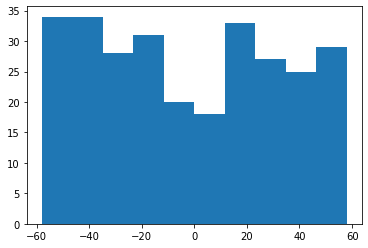

In [95]:
plt.hist(residuals)

In [96]:
mean_squared_error(y_test, preds) ** 0.5

34.85549127663882

In [97]:
from sklearn.preprocessing import LabelEncoder

In [99]:
print(df.isnull().any())

Temperature - (Celsius)    False
Year                       False
Month                      False
dtype: bool


In [100]:
print(df.dtypes)

Temperature - (Celsius)    float64
Year                         int64
Month                       object
dtype: object


In [101]:
target = df['Year']

In [102]:
le_Month = LabelEncoder()

In [103]:
inputs = df['Month']

In [104]:
inputs_n = df.drop(['Month'],axis='columns')

In [105]:
inputs_n

,Temperature - (Celsius),Year
0,7.72768,1901
1,8.93600,1901
2,16.96320,1901
3,21.27410,1901
4,26.04970,1901
...,...,...
1387,27.63320,2016
1388,26.71790,2016
1389,22.39820,2016
1390,15.76720,2016


In [106]:
target

0       1901
1       1901
2       1901
3       1901
4       1901
        ... 
1387    2016
1388    2016
1389    2016
1390    2016
1391    2016
Name: Year, Length: 1392, dtype: int64

In [107]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [108]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [109]:
model.score(inputs_n,target)

1.0

In [110]:
#random forest regressor

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,random_state=100)

In [113]:
x_train.shape

(1044,)

In [115]:
#Random Forest Model

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
model = RandomForestRegressor()

In [118]:
model.fit(inputs_n, target)

RandomForestRegressor()

In [119]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [120]:
preds

array([1958.29098574, 1958.21817559, 1957.7173799 , 1957.02664328,
       1958.87805524, 1958.64771734, 1956.94736937, 1957.1507619 ,
       1958.99883656, 1958.9749313 , 1958.82030511, 1956.98546719,
       1957.03529074, 1957.6146204 , 1959.01070385, 1957.63720038,
       1958.60907334, 1958.5513734 , 1958.01037751, 1958.99308364,
       1958.80361861, 1957.25398324, 1957.03464015, 1957.23635299,
       1958.8545817 , 1958.11454261, 1958.84955166, 1958.35090452,
       1958.88840649, 1958.43352377, 1958.81565658, 1957.07544978,
       1958.67633136, 1958.42461828, 1957.56648859, 1957.08494964,
       1958.63884197, 1957.22273873, 1957.63384702, 1958.51387396,
       1958.66453435, 1958.94022298, 1958.90538415, 1958.872975  ,
       1957.1061441 , 1958.77263514, 1958.93318494, 1958.5934812 ,
       1956.96993128, 1958.85244318, 1958.07124005, 1958.29914827,
       1957.67494078, 1958.97994126, 1956.9868226 , 1958.32634666,
       1958.65188394, 1958.60012769, 1959.07515068, 1956.88704

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split


In [123]:
mydata = pd.read_csv(r'tempreture_1901_2016_pakistan.csv')
df = pd.DataFrame(mydata, columns = ['Temperature - (Celsius)','Year','Month'])

In [124]:
x = df.iloc[:, 1]
y = df.iloc[:, 2]

In [234]:
x_train, x_test, y_train, y_test = train_test_split(df['Temperature - (Celsius)'], df['Month'], test_size = 0.2)

In [235]:
knn.fit(np.array(x_train).reshape(-1,1), y_train)

KNeighborsClassifier()

In [236]:
knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier()>

In [237]:
#Confusion Matrix

In [238]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(np.array(x_test).reshape(-1,1))
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0, 17,  0,  0,  0,  4,  0,  0,  4,  0,  0,  0],
       [ 0,  0, 13,  1,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  9,  5,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  3,  2, 12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 13,  5,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 14,  7,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 13,  0, 15,  0,  0],
       [ 2,  6,  0,  0,  0,  1,  0,  0,  9,  0,  0, 13],
       [ 0,  0,  0,  1,  0,  0,  0,  6,  0, 12,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0, 22]])

Text(42.0, 0.5, 'Year difference')

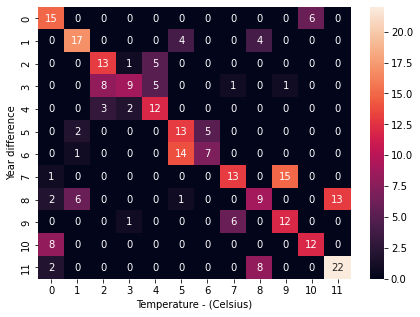

In [239]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Temperature - (Celsius)')
plt.ylabel('Year difference')

In [132]:
#classification reports

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       April       0.52      0.52      0.52        21
      August       0.61      0.83      0.70        24
    December       0.32      0.26      0.29        23
    February       0.36      0.35      0.36        23
     January       0.70      0.91      0.79        23
        July       0.58      0.48      0.52        23
        June       0.33      0.29      0.31        17
       March       0.63      0.77      0.69        22
         May       0.42      0.47      0.44        30
    November       0.81      0.52      0.63        25
     October       0.60      0.60      0.60        20
   September       0.50      0.43      0.46        28

    accuracy                           0.54       279
   macro avg       0.53      0.54      0.53       279
weighted avg       0.53      0.54      0.53       279



# Save the Machine learing Model

In [286]:
import joblib
joblib.dump(lr,"Pakistan_temperature_predicator_model.pkl")

['Pakistan_temperature_predictor_model.pkl']

In [308]:
model = joblib.load("Pakistan_temperature_predictor_model.pkl")

In [315]:
model.predict(np.array([[2022]]))

array([20.46077355])